In [44]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
# Libs para anaálises gráficas
import seaborn as sns
import plotly.graph_objects as go
# Lib para ignorar avisos
import warnings
# Desabilitando avisos
warnings.filterwarnings('ignore')

In [45]:

# Obtendo os dados históricos das ações da Petrobras
petr4 = yf.Ticker("PETR4.SA")
Base_Dados = petr4.history(period="2y")


In [46]:
Base_Dados.drop(columns=['Dividends','Stock Splits'], inplace=True)

In [47]:
# Convertendo a coluna 'data' para datetime
Base_Dados = Base_Dados.reset_index()

In [48]:
Base_Dados = Base_Dados.rename(columns={'Date': 'Data', 
                                        'Open': 'Abertura', 
                                        'High': 'Maior',
                                        'Low':  'Menor',
                                        'Close': 'Fechamento'                                      
                                       })

In [49]:
# Remover a informação de fuso horário usando tz_localize(None)
Base_Dados['Data'] = Base_Dados['Data'].dt.tz_localize(None)

In [65]:
Base_Dados = Base_Dados.drop(df.index[-1])

In [66]:
Base_Dados.head()

,Data,Abertura,Maior,Menor,Fechamento,Volume,Mes
0,2022-05-16,16.890326,17.201010,16.771970,17.067860,92075300,5
1,2022-05-17,17.260188,17.329228,16.836080,16.845943,90914700,5
2,2022-05-18,16.855807,17.043204,16.485946,16.569780,80986200,5
3,2022-05-19,16.530331,16.910055,16.436633,16.850876,63983100,5
4,2022-05-20,17.057997,17.176353,16.890327,17.176353,79589900,5


In [67]:
Base_Dados.shape

(499, 7)

In [68]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        499 non-null    datetime64[ns]
 1   Abertura    499 non-null    float64       
 2   Maior       499 non-null    float64       
 3   Menor       499 non-null    float64       
 4   Fechamento  499 non-null    float64       
 5   Volume      499 non-null    int64         
 6   Mes         499 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1)
memory usage: 25.5 KB


In [69]:
Base_Dados.describe()

,Data,Abertura,Maior,Menor,Fechamento,Volume,Mes
count,499,499.000000,499.000000,499.000000,499.000000,4.990000e+02,499.000000
mean,2023-05-12 21:47:15.270541056,25.151193,25.520142,24.813219,25.186715,6.376815e+07,6.482966
min,2022-05-16 00:00:00,14.299373,14.887396,14.238922,14.447754,1.282670e+07,1.000000
25%,2022-11-10 12:00:00,18.368389,18.725043,18.027975,18.350400,3.921780e+07,4.000000
50%,2023-05-15 00:00:00,22.411583,22.927277,22.083228,22.505859,5.560530e+07,7.000000
75%,2023-11-09 12:00:00,32.199226,32.550373,31.863639,32.184719,7.839715e+07,9.000000
max,2024-05-14 00:00:00,41.840000,42.090000,41.509998,41.669998,3.195016e+08,12.000000
std,NaN,7.725111,7.768572,7.705243,7.745378,3.540875e+07,3.429322


In [70]:
# Series Temporais
Dados = Base_Dados.set_index('Data')

Dados.head()

,Abertura,Maior,Menor,Fechamento,Volume,Mes
Data,,,,,,
2022-05-16,16.890326,17.201010,16.771970,17.067860,92075300,5
2022-05-17,17.260188,17.329228,16.836080,16.845943,90914700,5
2022-05-18,16.855807,17.043204,16.485946,16.569780,80986200,5
2022-05-19,16.530331,16.910055,16.436633,16.850876,63983100,5
2022-05-20,17.057997,17.176353,16.890327,17.176353,79589900,5


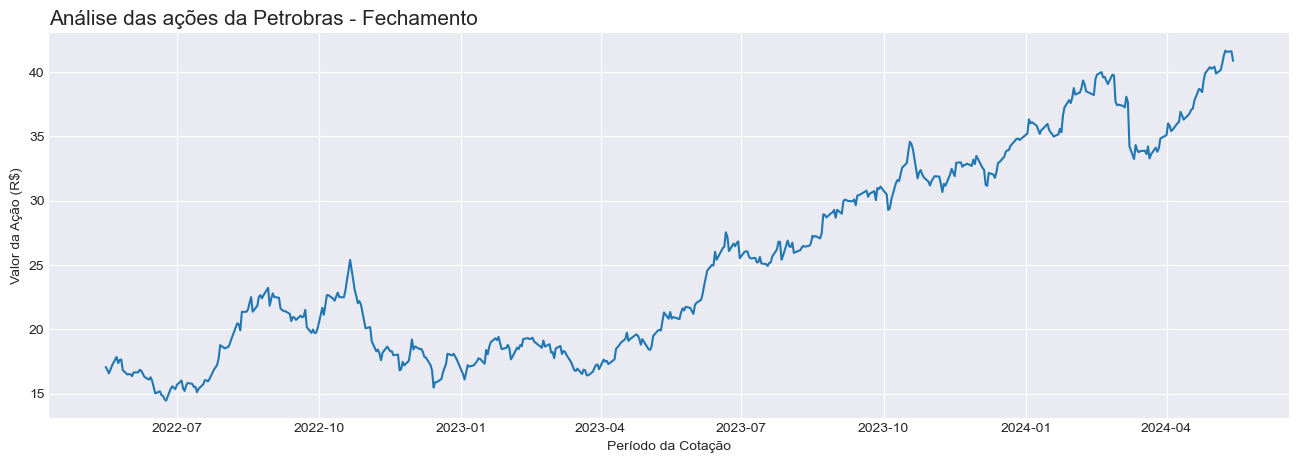

In [75]:
plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(16, 5) )
plt.title('Análise das ações da Petrobras - Fechamento', fontsize=15, loc='left')
plt.plot( Dados.index, Dados['Fechamento'] )

plt.xlabel('Período da Cotação')
plt.ylabel('Valor da Ação (R$)');

In [72]:
Dados.tail()

,Abertura,Maior,Menor,Fechamento,Volume,Mes
Data,,,,,,
2024-05-08,40.349998,41.330002,40.310001,41.270000,25352000,5
2024-05-09,41.060001,41.840000,40.939999,41.669998,27206400,5
2024-05-10,41.840000,42.090000,41.500000,41.580002,27968700,5
2024-05-13,41.740002,41.970001,41.509998,41.619999,18394300,5
2024-05-14,40.759998,41.299999,40.160000,40.869999,53613200,5


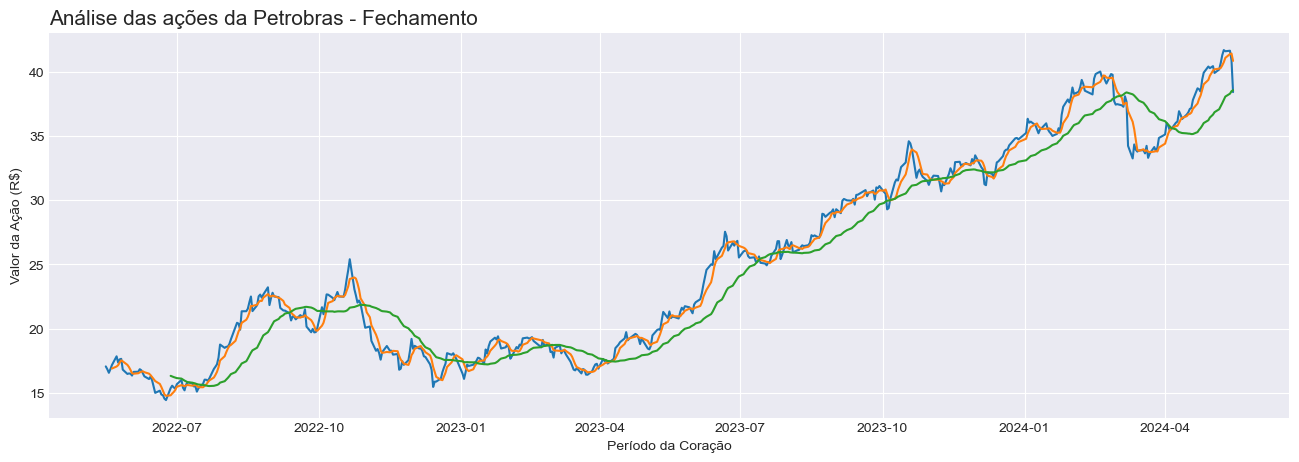

In [58]:
Media_Movel = Dados['Fechamento'].rolling(5).mean()
Media_Tendencia = Dados['Fechamento'].rolling(30).mean()

plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(16, 5) )
plt.title('Análise das ações da Petrobras - Fechamento', fontsize=15, loc='left')

plt.plot( Dados.index, Dados['Fechamento'] )
plt.plot( Dados.index, Media_Movel )
plt.plot( Dados.index, Media_Tendencia )

plt.xlabel('Período da Coração')
plt.ylabel('Valor da Ação (R$)');

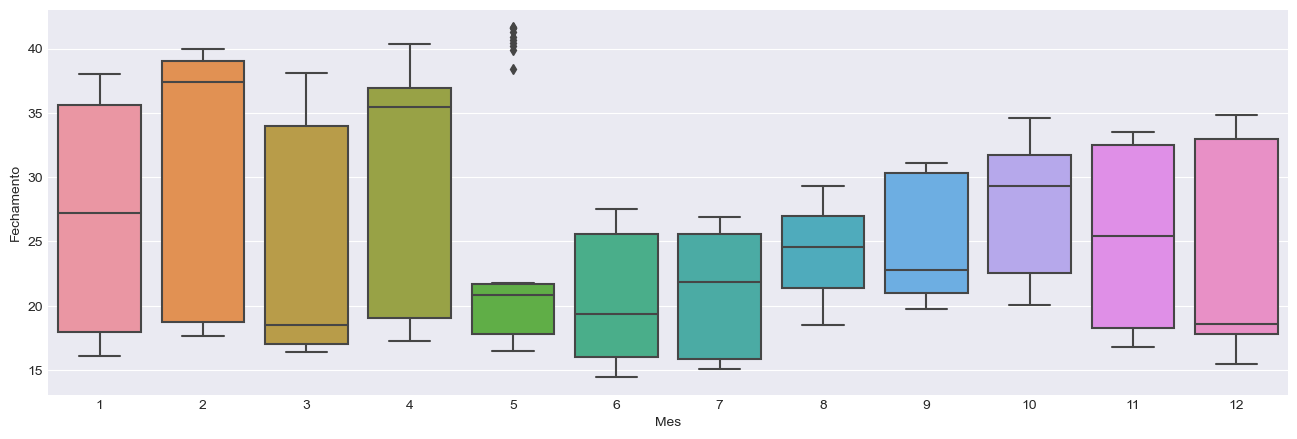

In [60]:
# Boxplot Mensal

Base_Dados['Mes'] = Base_Dados['Data'].dt.month

plt.figure( figsize=(16, 5) )
sns.boxplot( data=Base_Dados, x='Mes', y='Fechamento' );

In [61]:
Base_Dados.groupby(['Mes']).describe()['Fechamento']

,count,mean,min,25%,50%,75%,max,std
Mes,,,,,,,,
1,44.0,26.971248,16.095324,17.982956,27.202163,35.591602,38.006649,9.167481
2,37.0,29.142336,17.665947,18.768269,37.428528,39.069641,40.002094,10.281538
3,43.0,25.481453,16.419533,17.057152,18.516106,34.001778,38.081245,8.911208
4,40.0,28.932000,17.291304,19.061863,35.470387,36.959971,40.391277,9.485112
5,44.0,24.184757,16.481098,17.803261,20.825274,21.683525,41.669998,9.200776
6,42.0,20.508207,14.447754,16.007110,19.364816,25.606854,27.541689,4.962320
7,42.0,20.914867,15.107217,15.857357,21.848722,25.604692,26.901791,4.911157
8,46.0,24.203342,18.508951,21.414913,24.580816,26.983939,29.282766,3.449254
9,41.0,25.515469,19.711151,20.956985,22.795433,30.306135,31.096107,4.767195


In [76]:
#
Grafico = go.Figure(
    data=[
          go.Candlestick(
              x= Dados.index,
              open = Dados['Abertura'],
              high = Dados['Maior'],
              low = Dados['Menor'],
              close = Dados['Fechamento'],
          )
    ]
)

Grafico.update_layout( xaxis_rangeslider_visible=False )

Grafico.show()